In [1]:
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv("Gemini_1INCHUSD_1h.csv", index_col = ['date'], parse_dates = True)
df = df[['unix','symbol','open','high','low','close','Volume 1INCH' ,'Volume USD']]
df.head(n=10)

,unix,symbol,open,high,low,close,Volume 1INCH,Volume USD
date,,,,,,,,
2022-04-27 00:00:00,1651017600000,1INCH/USD,1.2871,1.2932,1.2865,1.2888,428.840257,552.689323
2022-04-26 23:00:00,1651014000000,1INCH/USD,1.2968,1.2970,1.2589,1.2871,1189.529669,1531.043637
2022-04-26 22:00:00,1651010400000,1INCH/USD,1.3093,1.3124,1.2961,1.2968,1281.291941,1661.579389
2022-04-26 21:00:00,1651006800000,1INCH/USD,1.2981,1.3116,1.2959,1.3093,2868.856831,3756.194249
2022-04-26 20:00:00,1651003200000,1INCH/USD,1.3053,1.3095,1.2900,1.2981,2084.128819,2705.407620
2022-04-26 19:00:00,1650999600000,1INCH/USD,1.3203,1.3240,1.2917,1.3053,12134.329536,15838.940343
2022-04-26 18:00:00,1650996000000,1INCH/USD,1.3213,1.3213,1.3105,1.3203,460.162917,607.553099
2022-04-26 17:00:00,1650992400000,1INCH/USD,1.3324,1.3324,1.3104,1.3213,2447.070851,3233.314715
2022-04-26 16:00:00,1650988800000,1INCH/USD,1.3181,1.3362,1.3092,1.3324,1160.667932,1546.473953


<ipython-input-3-bfd108662dd6>:14: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(y, model = 'additive', freq = 12)


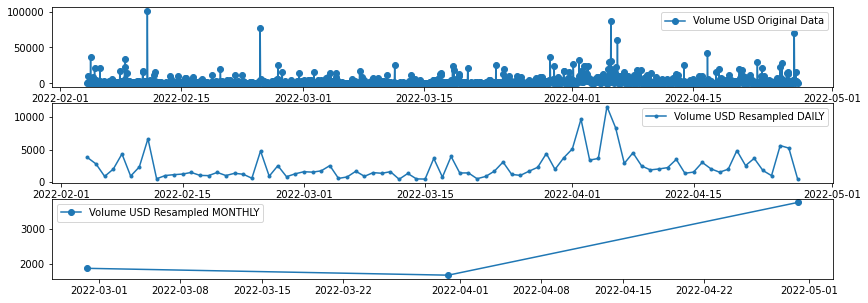

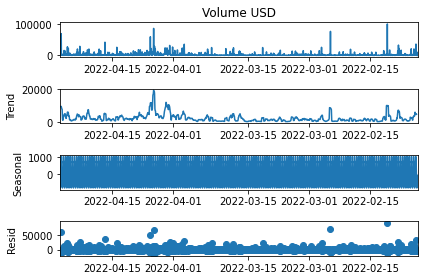

In [3]:
y = df['Volume USD']
fig, ax = plt.subplots(3, 1, figsize = (14, 5))
ax[0].plot(y, marker = 'o', linestyle = '-', label = "Volume USD Original Data")
ax[1].plot(y.resample('D').mean(), marker = '.', linestyle = '-', label = "Volume USD Resampled DAILY")
ax[2].plot(y.resample('M').mean(), marker = 'o', linestyle = '-', label = "Volume USD Resampled MONTHLY")
#ax[3].plot(y.resample('Y').mean(), marker = '.', linestyle = '-', label = "Volume USD Resampled ANNUAL")
for i in range(0, 3):
    ax[i].legend()

'''
Seasonal-Decomposition of USD Volume
-> Additive Decomposition Model for USD Volume
'''
decomposition = seasonal_decompose(y, model = 'additive', freq = 12)
fig = decomposition.plot()

C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]
C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integ

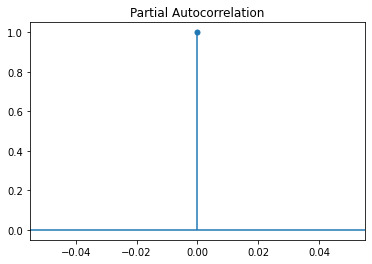

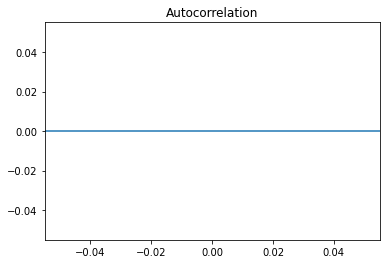

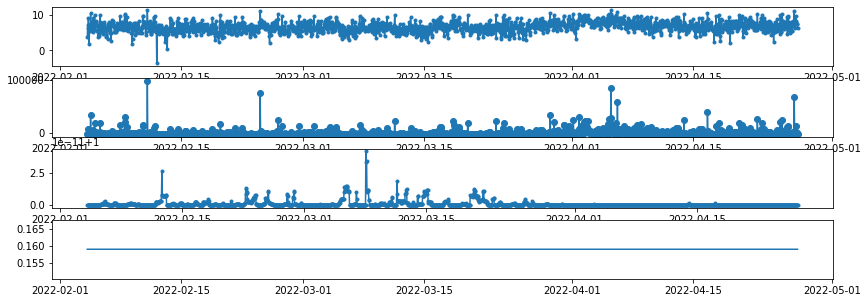

In [4]:
'''
Basic Autocorrelation Coefficients/Values/Functions:
[pct_change, autocorr, corr, shift, diff, np.log, mean difference, rolling correlation, pacf, acf, white noise, lag plots]
'''
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

y = df['Volume USD']

df['Percent Change - Volume USD'] = df['Volume USD'].pct_change()
df['Volume USD and Volume 1INCH Corr'] = df['Volume USD'].corr(df['Volume 1INCH'])
df['Autocorr Volume USD'] = df['Volume USD'].autocorr()
df['Volume USD First Difference'] = df['Volume USD'].diff(1)
df['Log Volume USD'] = df['Volume USD'].apply(lambda x: np.log(x))
df['Mean Difference - Volume USD'] = df['Volume USD'] - df['Volume USD'].mean()
df['Rolling Correlation - Volume USD'] = df['Volume USD'].rolling(window = 12).corr()
y_detrend = (y - y.rolling(window = 12).mean()) / y.rolling(window = 12).std()
lag_correlation = acf(df['Log Volume USD'].diff(1).iloc[1:], fft = False)
partial_lag_correlation = pacf(df['Log Volume USD'].diff(1).iloc[1:])

plot_pacf(df['Log Volume USD'])
plot_acf(df['Log Volume USD'])

fig, ax = plt.subplots(4, 1, figsize = (14, 5))
ax[0].plot(df['Log Volume USD'], marker = '.', linestyle = '-', label = "Log Volume USD")
ax[1].plot(df['Mean Difference - Volume USD'], marker = 'o', linestyle = '-', label = "Mean Difference - Volume USD")
ax[2].plot(df['Rolling Correlation - Volume USD'], marker = '.', linestyle = '-')
ax[3].plot(df['Autocorr Volume USD'])

In [16]:
'''
AutoRegression -> ARMA (Autoregressive Moving Average Model)
Autoregressive (AR) Model is when present value of a time series can be predicted from using previous values of the same series. 
It's a regression using its same series, though shifted by a time step, called a lag. The present value is a weighted average of its past values. 
Both the t-1 and t-2 are lags of the time series y. The error term (noise) is represented as e. The values a1 and a2 are the coefficients of the model.
'''

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from pandas import concat

train = (df['Volume USD'][df['Volume USD'].index < '2022-03-12'])
test = (df['Volume USD'][df['Volume USD'].index >= '2022-03-12'])
train = np.array(train)
test = np.array(test)

In [20]:
from statsmodels.tsa.ar_model import AR

ar_model = sm.tsa.AR(train)
ar_fit = ar_model.fit()
print("Lag: {}".format(ar_fit.k_ar))
print("Coefficients: {}".format(ar_fit.params))

Lag: 21
Coefficients: [ 1.35716346e+03  3.54458874e-02  3.58680077e-02  1.89182760e-02
  1.40031604e-02 -1.92981298e-02  2.43934138e-02 -6.10375620e-03
 -2.23400936e-02 -2.98160513e-02 -4.74415505e-03  3.63591158e-02
  6.80091785e-02  5.92878212e-02 -2.79080114e-02  8.63393596e-03
 -2.80920950e-02  4.15856837e-02 -2.21344900e-02 -1.08290296e-02
  4.25622803e-02  1.10091373e-02]


C:\Users\kzhan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmo

In [33]:
predictions = ar_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
print('Volume USD Value 1:',test[1],'Predicted value: ',predictions[1])

Volume USD Value 1: 1531.0436369698998 Predicted value:  2682.856276925264


In [26]:
'''
SARIMA Model -> Optimization, Finding best P, Q, D, and grid searching
'''
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [32]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
model_temporary = None
for param in pdq:   
    for seasonal_parameters in seasonal_pdq: 
        model_temporary = sm.tsa.SARIMAX(train,order = param, seasonal_order = seasonal_parameters,enforce_invertibility=False,
                             enforce_stationarity = False)
        results = model_temporary.fit(disp = False)
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_seasonal_pdq = seasonal_parameters
print("ARIMA Params {} * {} - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))  

ARIMA Params (1, 1, 1) * (0, 1, 1, 12) - AIC:16700.40817547436


In [30]:
sarima_model = sm.tsa.SARIMAX(train,order=(1,1,1),seasonal_order=(0, 1, 1, 12),enforce_invertibility=False,
                             enforce_stationarity=False)
sarima_fit = sarima_model.fit()
predictions = sarima_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


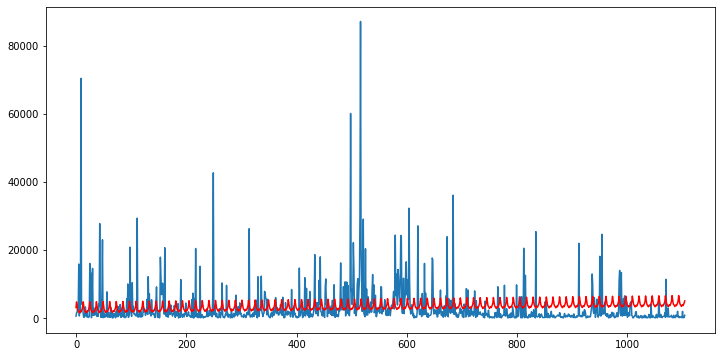

In [31]:
plt.figure(figsize=(12,6))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()